In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center >= radius
    return mask

In [49]:
mask_1 = create_circular_mask(arr.shape[0], arr.shape[1], center=[250,325], radius=200)
mask_2 = create_circular_mask(arr.shape[0], arr.shape[1], center=[250,325], radius=180)
# arr_masked = arr*mask_1
# arr_masked = arr_masked * mask_2

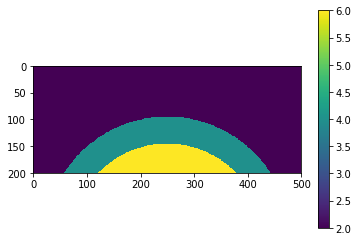

In [204]:
arr = np.ones((200,500))

mask_1 = create_circular_mask(arr.shape[0], arr.shape[1], center=[250,325], radius=230)
mask_2 = create_circular_mask(arr.shape[0], arr.shape[1], center=[250,325], radius=180)
mask_1 = np.where(mask_1 == True, mask_1, 3)
mask_2 = np.where(mask_2 == True, mask_2, 3)

plt.imshow(mask_1 + mask_2)
plt.colorbar()

anticline_vp = mask_1 + mask_2

# np.save('/data/anticline_vp_no_faults.npy', anticline_vp)

In [205]:
copy = np.roll(anticline_vp,4,axis=0)
copy2 = np.roll(anticline_vp,20,axis=0)
copy3 = np.roll(anticline_vp, 3, axis=0)

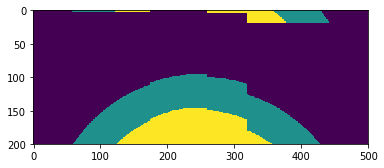

In [206]:
buttz = anticline_vp

test = copy[:,260:]
test_2 = copy2[:,320:]
test3 = copy3[:,:175]

buttz[:,260:] = test
buttz[:,320:] = test_2 
buttz[:,:175] = test3

plt.imshow(buttz)

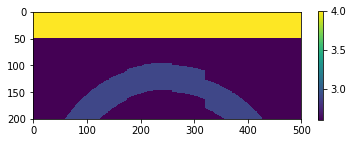

In [209]:
anticline_vp_faults_5m = buttz.astype('float64')
anticline_vp_faults_5m[:50,:] =-1
anticline_vp_faults_5m[anticline_vp_faults_5m == 6] = 2.6
anticline_vp_faults_5m[anticline_vp_faults_5m == 2] = 2.6
anticline_vp_faults_5m[anticline_vp_faults_5m == 6] = 2.6
anticline_vp_faults_5m[anticline_vp_faults_5m == 4] = 2.9
anticline_vp_faults_5m[anticline_vp_faults_5m == -1] = 4.

plt.imshow(anticline_vp_faults_5m, aspect='equal')
plt.colorbar(shrink=0.5)

In [210]:
np.save('data/anticline_vp_faults_5m.npy', anticline_vp_faults_5m)
np.save('data/anticline_vp_faults_5m.npy', anticline_vp)